In [1]:
!pip install kaggle

In [2]:
!pip install gdown

In [3]:
!pip install xgboost lightgbm catboost scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.6 MB/s eta 0:00:00


In [4]:
!gdown 12exNm8OH3itUIQ8cWi_fylcaN8x3qGzZ

Downloading...
From: https://drive.google.com/uc?id=12exNm8OH3itUIQ8cWi_fylcaN8x3qGzZ
To: /content/kaggle.json
100% 67.0/67.0 [00:00<00:00, 248kB/s]


In [5]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!gdown 1wJMd0UHu-jaCDQJ5xLAfQZ1lFAoAN6-w

Downloading...
From (original): https://drive.google.com/uc?id=1wJMd0UHu-jaCDQJ5xLAfQZ1lFAoAN6-w
From (redirected): https://drive.google.com/uc?id=1wJMd0UHu-jaCDQJ5xLAfQZ1lFAoAN6-w&confirm=t&uuid=ab0d178b-2847-4761-bbfd-59a5eb69c1c0
To: /content/cleaned_loan_data.csv
100% 2.81M/2.81M [00:00<00:00, 23.7MB/s]


In [16]:
import os
import contextlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

%matplotlib inline

In [12]:
data = pd.read_csv('/content/cleaned_loan_data.csv')

In [13]:
from sklearn.model_selection import train_test_split
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=142, stratify=y)

In [14]:
std = StandardScaler().fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

# Raw Scaled

# RS XGBoost

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.65      0.38      0.48      1327

    accuracy                           0.82      6000
   macro avg       0.74      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



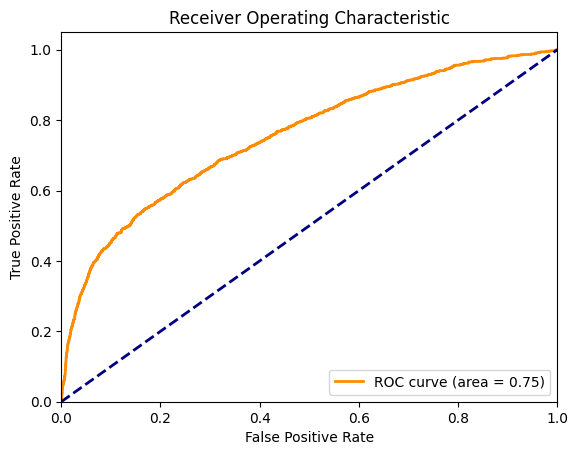

In [17]:
xgb_r = XGBClassifier()
xgb_r.fit(X_train, y_train)

y_pred = xgb_r.predict(X_test)
y_pred_proba = xgb_r.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# RS LGBM

[LightGBM] [Info] Number of positive: 5309, number of negative: 18691
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010983 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3515
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221208 -> initscore=-1.258639
[LightGBM] [Info] Start training from score -1.258639
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.65      0.38      0.48      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



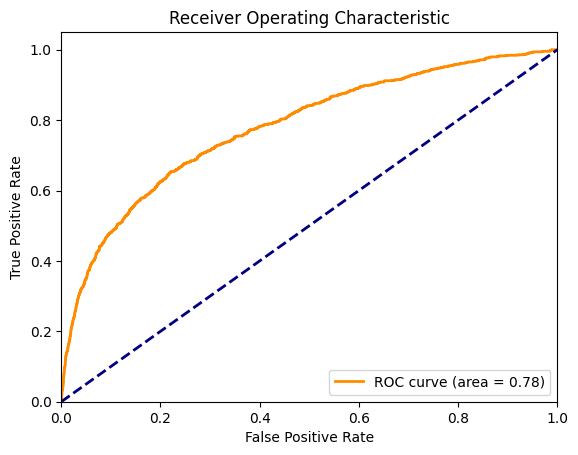

In [22]:
lgbm_r = LGBMClassifier()
lgbm_r.fit(X_train, y_train)

y_pred = lgbm_r.predict(X_test)
y_pred_proba = lgbm_r.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# RS CatBoost

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.65      0.38      0.48      1327

    accuracy                           0.82      6000
   macro avg       0.74      0.66      0.69      6000
weighted avg       0.80      0.82      0.80      6000



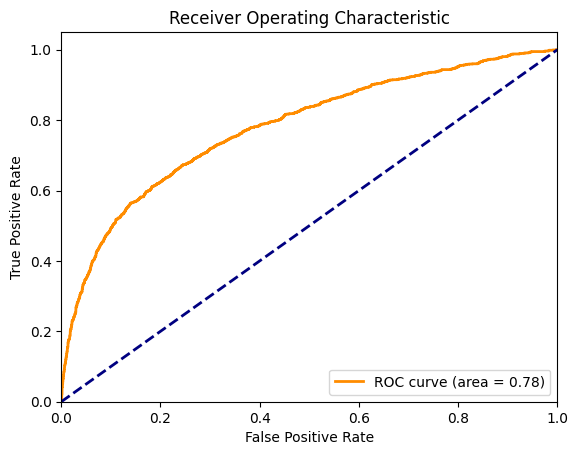

In [23]:
cat_r = CatBoostClassifier(verbose=0)
cat_r.fit(X_train, y_train)

y_pred = cat_r.predict(X_test)
y_pred_proba = cat_r.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# RS AdaBoost

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4673
           1       0.66      0.32      0.43      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.64      0.66      6000
weighted avg       0.79      0.81      0.79      6000



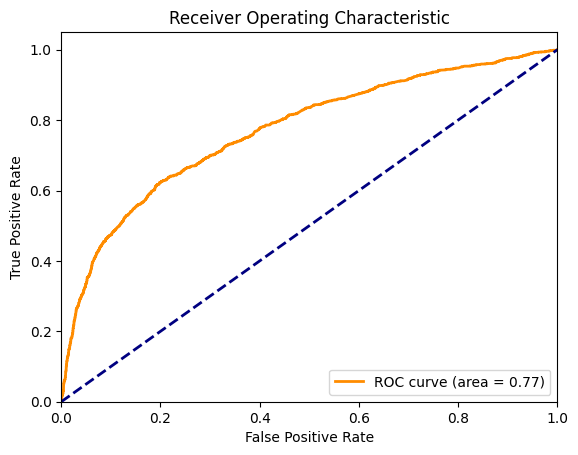

In [24]:
ada_r = AdaBoostClassifier()
ada_r.fit(X_train, y_train)

y_pred = ada_r.predict(X_test)
y_pred_proba = ada_r.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# RS Gradient Boost

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.66      0.37      0.48      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



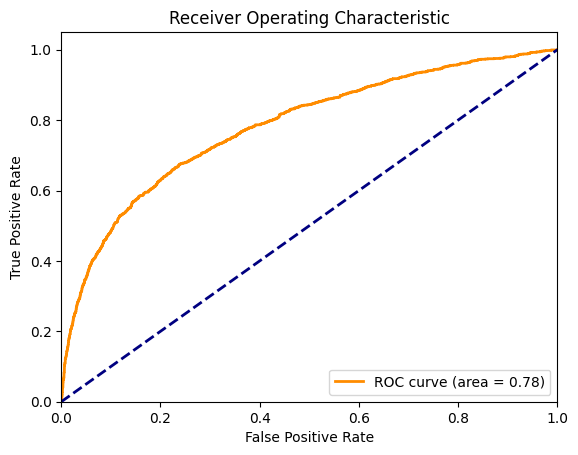

In [25]:
gb_r = GradientBoostingClassifier()
gb_r.fit(X_train, y_train)

y_pred = gb_r.predict(X_test)
y_pred_proba = gb_r.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Selection WoE + Scaled

In [27]:
selected_features = ['LIMIT_BAL','EDUCATION','AGE','PAY_3',
                     'PAY_4','PAY_5','PAY_6','BILL_AMT1',
                     'BILL_AMT2','BILL_AMT4','BILL_AMT5',
                     'BILL_AMT6','PAY_AMT1','PAY_AMT2',
                     'PAY_AMT3','PAY_AMT4', 'PAY_AMT5','PAY_AMT6']

X_woe = data[selected_features]
y_woe = data.iloc[:,-1]

Xw_train, Xw_test, yw_train, yw_test = train_test_split(X_woe, y_woe, train_size=0.8, random_state=142, stratify=y)
std = StandardScaler().fit(Xw_train)
Xw_train = std.transform(Xw_train)
Xw_test = std.transform(Xw_test)

# WoE XGB

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.94      0.87      4673
           1       0.56      0.29      0.38      1327

    accuracy                           0.79      6000
   macro avg       0.69      0.61      0.63      6000
weighted avg       0.76      0.79      0.77      6000



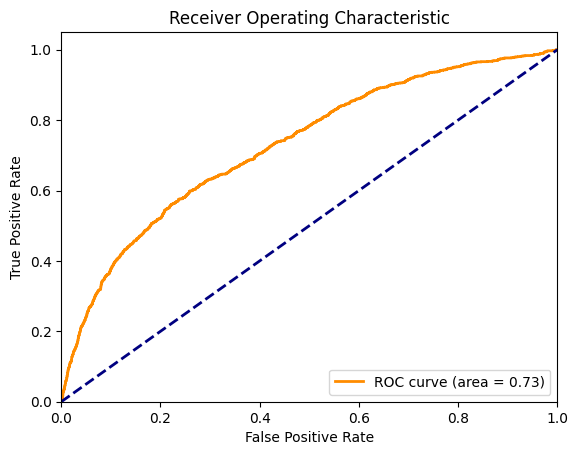

In [28]:
xgb_w = XGBClassifier()
xgb_w.fit(Xw_train, yw_train)

yw_pred = xgb_w.predict(Xw_test)
yw_pred_proba = xgb_w.predict_proba(Xw_test)[:, 1]

print("Classification Report:")
print(classification_report(yw_test, yw_pred))

fpr, tpr, thresholds = roc_curve(yw_test, yw_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# WoE LGBM

[LightGBM] [Info] Number of positive: 5309, number of negative: 18691
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006945 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2978
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221208 -> initscore=-1.258639
[LightGBM] [Info] Start training from score -1.258639
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4673
           1       0.62      0.27      0.37      1327

    accuracy                           0.80      6000
   macro avg       0.72      0.61      0.63      6000
weighted avg       0.78      0.80      0.77      6000



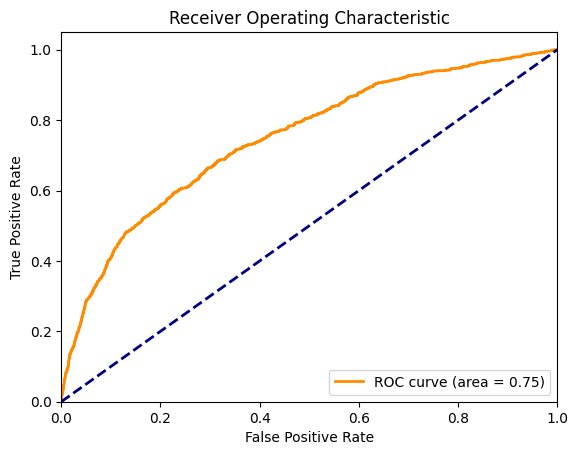

In [29]:
lgbm_w = LGBMClassifier()
lgbm_w.fit(Xw_train, yw_train)

yw_pred = lgbm_w.predict(Xw_test)
yw_pred_proba = lgbm_w.predict_proba(Xw_test)[:, 1]

print("Classification Report:")
print(classification_report(yw_test, yw_pred))

fpr, tpr, thresholds = roc_curve(yw_test, yw_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# WoE CatBoost

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4673
           1       0.59      0.27      0.37      1327

    accuracy                           0.80      6000
   macro avg       0.70      0.61      0.62      6000
weighted avg       0.77      0.80      0.77      6000



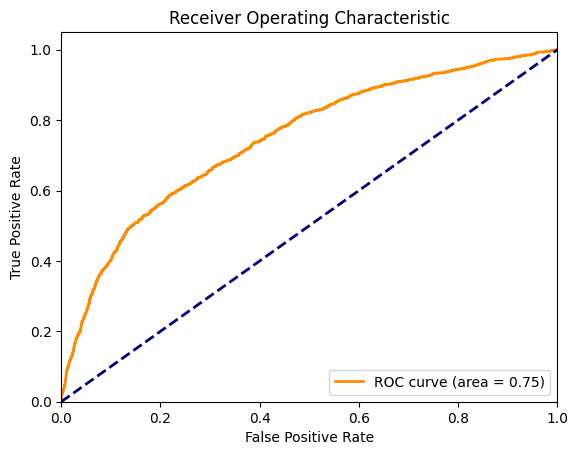

In [30]:
cat_w = CatBoostClassifier(verbose=0)
cat_w.fit(Xw_train, yw_train)

yw_pred = cat_w.predict(Xw_test)
yw_pred_proba = cat_w.predict_proba(Xw_test)[:, 1]

print("Classification Report:")
print(classification_report(yw_test, yw_pred))

fpr, tpr, thresholds = roc_curve(yw_test, yw_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# WoE AdaBoost

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      4673
           1       0.61      0.24      0.34      1327

    accuracy                           0.80      6000
   macro avg       0.71      0.60      0.61      6000
weighted avg       0.77      0.80      0.76      6000



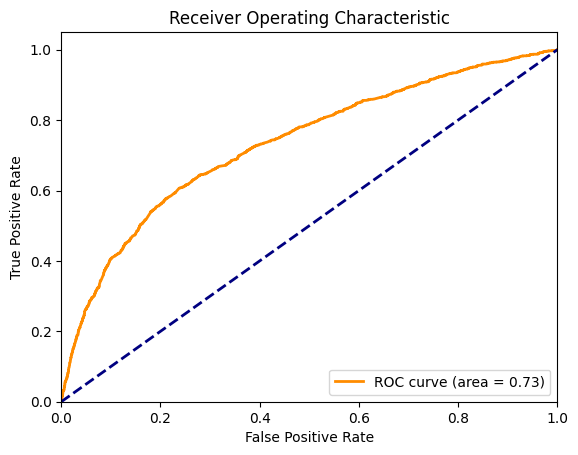

In [31]:
ada_w = AdaBoostClassifier()
ada_w.fit(Xw_train, yw_train)

yw_pred = ada_w.predict(Xw_test)
yw_pred_proba = ada_w.predict_proba(Xw_test)[:, 1]

print("Classification Report:")
print(classification_report(yw_test, yw_pred))

fpr, tpr, thresholds = roc_curve(yw_test, yw_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# WoE Gradient Boost

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      4673
           1       0.62      0.24      0.34      1327

    accuracy                           0.80      6000
   macro avg       0.72      0.60      0.61      6000
weighted avg       0.77      0.80      0.76      6000



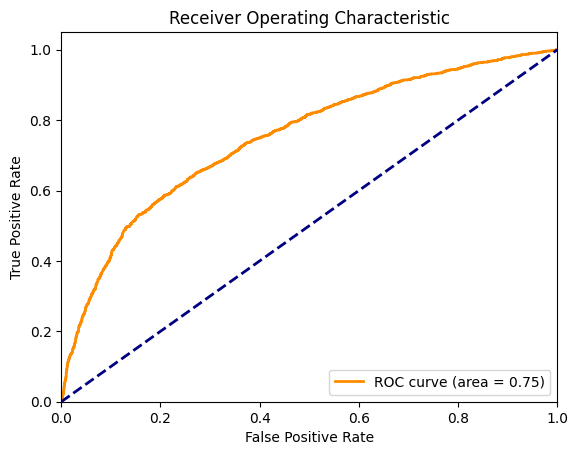

In [32]:
gb_w = GradientBoostingClassifier()
gb_w.fit(Xw_train, yw_train)

yw_pred = gb_w.predict(Xw_test)
yw_pred_proba = gb_w.predict_proba(Xw_test)[:, 1]

print("Classification Report:")
print(classification_report(yw_test, yw_pred))

fpr, tpr, thresholds = roc_curve(yw_test, yw_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()